In [1]:
state = {}

def play(a ,p):
    moves = possibleMoves(a)
    if not moves:
        if p:
            return -1
        else:
            return 1
    if p:
        minNum = float("inf")
        for move in moves:
            if move in state:
                num = state[move]
            else:
                num = play(move,not p)
            if num < minNum:
                minNum = num
                state[move] = num
        return minNum
    else:
        maxNum = float("-inf")
        for move in moves:
            if move in state:
                num = -1 * state[move]
            else:
                num = play(move, not p)
            if num > maxNum:
                maxNum = num
                state[move] = -1 *num
        return maxNum
    

def playNoMem(a ,p):
    moves = possibleMoves(a)
    if not moves:
        if p:
            return -1
        else:
            return 1
    if p:
        minNum = float("inf")
        for move in moves:
            num = playNoMem(move,not p)
            if num < minNum:
                minNum = num
        return minNum
    else:
        maxNum = float("-inf")
        for move in moves:
            num = playNoMem(move, not p)
            if num > maxNum:
                maxNum = num
        return maxNum  

def possibleMoves(a):
    list = []
    if a[0]-1 >= 0 and a[1]-1 >= 0 and a[2]-1 >= 0: 
        list.append((a[0]-1,a[1]-1,a[2]-1))
    if a[0]-2 >= 0 and a[1]-2 >= 0: 
        list.append((a[0]-2,a[1]-2,a[2]))
    if a[0]-2 >= 0 and a[2]-2 >= 0: 
        list.append((a[0]-2,a[1],a[2]-2))
    if a[2]-2 >= 0 and a[1]-2 >= 0: 
        list.append((a[0],a[1]-2,a[2]-2))
    if a[0]-3 >= 0: 
        list.append((a[0]-3,a[1],a[2]))
    if a[1]-3 >= 0: 
        list.append((a[0],a[1]-3,a[2]))
    if a[2]-3 >= 0:
        list.append((a[0],a[1],a[2]-3))
    return list


In [6]:
import time
import numpy as np

mem =[]
for n in range(1,13):
    t1 = time.time()
    play((n,n,n), True)
    t2= time.time()
    mem.append(t2-t1)
    
noMem =[]
for n in range(1,13):
    t3 = time.time()
    playNoMem((n,n,n), True)
    t4= time.time()
    noMem.append(t4-t3)

/Users/Nathan/Library/Python/3.5/lib/python/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/Nathan/Library/Python/3.5/lib/python/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


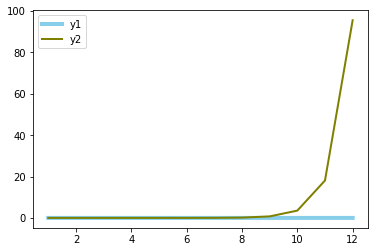

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame({'x': range(1,13), 'y1': np.asarray(mem), 'y2': np.asarray(noMem)}) # , 'y2': np.asarray(x3)

plt.plot('x', 'y1', data=df, marker='', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.legend()
